<a href="https://colab.research.google.com/github/AnshulRustogi/Stock-Market-Movement-Predictor/blob/development/model/ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
stock = pd.read_csv('final_stock_data.csv')

In [5]:
stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Movement
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,0.0,0.0,1
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,0.0,0.0,1
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0.0,0.0,0
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0.0,0.0,0
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,0.0,0.0,1


In [6]:
labels = pd.read_csv('news_label.csv')

In [7]:
labels.head()

,Date,Sentiment
0,2012-07-16,0.0
1,2012-07-19,0.0
2,2012-07-23,0.0
3,2012-07-24,0.0
4,2012-07-27,0.0


In [8]:
final = pd.merge(stock, labels) 

In [9]:
final.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Movement,Sentiment
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,0.0,0.0,1,0.0
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,0.0,0.0,1,0.0
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0.0,0.0,0,0.0
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0.0,0.0,0,0.0
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,0.0,0.0,1,0.0


In [10]:
final = final.drop(['Dividends','Stock Splits','Date'], axis=1)

In [11]:
final.head()

,Open,High,Low,Close,Volume,Movement,Sentiment
0,18.478158,18.676643,18.475103,18.532818,301260400,1,0.0
1,18.666261,18.790544,18.505029,18.759092,436861600,1,0.0
2,18.150808,18.501977,17.946521,18.438766,487975600,0,0.0
3,18.547165,18.617399,18.276307,18.349901,565132400,0,0.0
4,17.558705,17.889109,17.454271,17.868649,403936400,1,0.0


In [12]:
final['Sentiment'].value_counts()

 0.000000    457
 0.500000    106
 0.333333     79
 0.250000     73
 1.000000     61
            ... 
 0.545455      1
-0.045455      1
 0.508475      1
 0.391304      1
-0.833333      1
Name: Sentiment, Length: 275, dtype: int64

In [13]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1991 non-null   float64
 1   High       1991 non-null   float64
 2   Low        1991 non-null   float64
 3   Close      1991 non-null   float64
 4   Volume     1991 non-null   int64  
 5   Movement   1991 non-null   int64  
 6   Sentiment  1991 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 124.4 KB


In [14]:
final.corr(method='pearson')

,Open,High,Low,Close,Volume,Movement,Sentiment
Open,1.000000,0.999912,0.999892,0.999749,-0.390073,-0.005057,-0.049931
High,0.999912,1.000000,0.999875,0.999879,-0.388443,-0.001179,-0.050084
Low,0.999892,0.999875,1.000000,0.999890,-0.392467,0.000166,-0.049125
Close,0.999749,0.999879,0.999890,1.000000,-0.390661,0.004701,-0.048916
Volume,-0.390073,-0.388443,-0.392467,-0.390661,1.000000,-0.065470,-0.067169
Movement,-0.005057,-0.001179,0.000166,0.004701,-0.065470,1.000000,0.050534
Sentiment,-0.049931,-0.050084,-0.049125,-0.048916,-0.067169,0.050534,1.000000


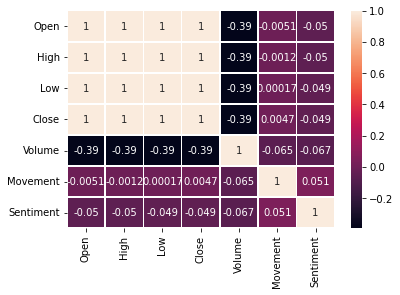

In [15]:
import seaborn as sns
sns.heatmap(final.corr(), linewidth=0.5, annot=True)

In [16]:
final['Close next data'] = final['Close'].shift(-1)
final

,Open,High,Low,Close,Volume,Movement,Sentiment,Close next data
0,18.478158,18.676643,18.475103,18.532818,301260400,1,0.000000,18.759092
1,18.666261,18.790544,18.505029,18.759092,436861600,1,0.000000,18.438766
2,18.150808,18.501977,17.946521,18.438766,487975600,0,0.000000,18.349901
3,18.547165,18.617399,18.276307,18.349901,565132400,0,0.000000,17.868649
4,17.558705,17.889109,17.454271,17.868649,403936400,1,0.000000,18.170046
...,...,...,...,...,...,...,...,...
1986,134.289993,137.339996,132.160004,135.429993,91533000,1,0.000000,130.059998
1987,132.080002,132.389999,129.039993,130.059998,108123900,0,-0.833333,131.559998
1988,130.070007,133.080002,129.809998,131.559998,134118500,1,0.058824,135.869995
1989,133.419998,137.059998,133.320007,135.869995,81000500,1,0.600000,135.350006


In [17]:
X = final.drop(['Movement', 'Close next data','High', 'Low'],axis=1)

In [18]:
X[:-1]

,Open,Close,Volume,Sentiment
0,18.478158,18.532818,301260400,0.000000
1,18.666261,18.759092,436861600,0.000000
2,18.150808,18.438766,487975600,0.000000
3,18.547165,18.349901,565132400,0.000000
4,17.558705,17.868649,403936400,0.000000
...,...,...,...,...
1985,133.130005,132.759995,84784300,0.461538
1986,134.289993,135.429993,91533000,0.000000
1987,132.080002,130.059998,108123900,-0.833333
1988,130.070007,131.559998,134118500,0.058824


In [19]:
y = final['Movement'][:-1]

In [20]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1985    1
1986    1
1987    0
1988    1
1989    1
Name: Movement, Length: 1990, dtype: int64

# Splitting into train and test

In [66]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y, test_size=0.2, shuffle=False)

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler_close, scaler_open, scaler_volume = MinMaxScaler(feature_range=(0,1)), MinMaxScaler(feature_range=(0,1)), MinMaxScaler(feature_range=(0,1))

scaled_close_data = scaler_close.fit_transform(X_train.iloc[:, 0:1])
scaled_open_data = scaler_open.fit_transform(X_train.iloc[:, 1:2])
scaled_volume = scaler_volume.fit_transform(X_train.iloc[:, 2:3])

X_train = np.concatenate([scaled_close_data, scaled_open_data, scaled_volume, X_train.iloc[:, 3:4]], axis=1)

In [44]:
scaled_close_data_test = scaler_close.transform(X_test.iloc[:, 0:1])
scaled_open_data_test = scaler_open.transform(X_test.iloc[:, 1:2])
scaled_volume_test = scaler_volume.transform(X_test.iloc[:, 2:3])

X_test = np.concatenate([scaled_close_data_test, scaled_open_data_test, scaled_volume_test, X_test.iloc[:, 3:4]], axis=1)

In [45]:
print(X_train.shape)
print(X_test.shape)

(1592, 3)
(398, 3)


In [46]:
print(y_train.shape)
print(y_test.shape)

(1592,)
(398,)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(mean_squared_error(pred,y_test))
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.4472361809045226
0.550251256281407
0.5527638190954773


In [ ]:
valid = pd.DataFrame({'actual': y_test, 'predicted': pred})
from sklearn.metrics import accuracy_score
accuracy_score(valid['actual'], valid['predicted'])

0.5527638190954773

# Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
model = svm.SVC() 
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(pred,y_test))
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.5452261306532663
0.5879396984924623
0.5452261306532663


In [ ]:
valid = pd.DataFrame({'actual': y_test, 'predicted': pred})
from sklearn.metrics import accuracy_score
accuracy_score(valid['actual'], valid['predicted'])

0.5452261306532663

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(pred,y_test))
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.5477386934673367
1.0
-0.8239682256791507


In [ ]:
valid = pd.DataFrame({'actual': y_test, 'predicted': pred})
from sklearn.metrics import accuracy_score
accuracy_score(valid['actual'], valid['predicted'])

0.5477386934673367

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(pred.round(),y_test))
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.5829145728643216
0.8771854687490108
-0.09032868599943988


In [ ]:
valid = pd.DataFrame({'actual': y_test, 'predicted': pred})
label = lambda x: 1 if x>=0.5 else 0
valid['predicted'] = valid.predicted.apply(label)
from sklearn.metrics import accuracy_score
accuracy_score(valid['actual'], valid['predicted'])

0.5829145728643216

# LSTM

In [2]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [31]:
model = Sequential()
#model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[0], X_train.shape[1])))
model.add(layers.InputLayer((4,)))
model.add(Dense(256))
model.add(Dropout(0.1)) 
model.add(Dense(256))
model.add(Dense(1, activation="sigmoid"))

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               1280      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 67,329
Trainable params: 67,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

In [34]:
y_test

1592    0
1593    0
1594    1
1595    1
1596    1
       ..
1985    1
1986    1
1987    0
1988    1
1989    1
Name: Movement, Length: 398, dtype: int64

In [38]:
from sklearn.metrics import accuracy_score

temp = model.predict(X_test)
for i in range(len(temp)):
  if temp[i]>0.5:
    temp[i] = 1
  else:
    temp[i] = 0
  
accuracy_score(y_test, temp)

In [61]:
model_2 = Sequential()
#model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[0], X_train.shape[1])))
model_2.add(layers.InputLayer((3,)))
model_2.add(Dense(256))
model_2.add(Dropout(0.1)) 
model_2.add(Dense(256, activation='relu'))
model_2.add(Dense(1, activation="sigmoid"))

In [62]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               1024      
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 67,073
Trainable params: 67,073
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

In [65]:
from sklearn.metrics import accuracy_score

temp = model_2.predict(X_test)
for i in range(len(temp)):
  if temp[i]>0.5:
      temp[i] = 1
  else:
      temp[i] = 0
              
accuracy_score(y_test, temp)

0.8291457286432161